In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


Chargement de donnees

In [ ]:
titanic = fetch_openml(name='titanic', version=1, as_frame=True)
df = titanic.frame
print(df.head())
print(df.info())


   pclass survived                                             name     sex  \
0       1        1                    Allen, Miss. Elisabeth Walton  female   
1       1        1                   Allison, Master. Hudson Trevor    male   
2       1        0                     Allison, Miss. Helen Loraine  female   
3       1        0             Allison, Mr. Hudson Joshua Creighton    male   
4       1        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis,

Data types

In [ ]:
df.dtypes

,0
pclass,int64
survived,category
name,object
sex,category
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


Visualiser les duplication

In [ ]:
df.duplicated().sum()
df.drop_duplicates()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Statistiques descriptives

In [ ]:
df.describe()
df.describe(include=['object', 'category'])

,survived,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,1309,295,1307,486,745
unique,2,1307,2,929,186,3,27,369
top,0,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,809,2,843,11,6,914,39,64


Colonnes utiles

In [ ]:
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']].copy()

In [ ]:
le = LabelEncoder()
df['survived'] = le.fit_transform(df['survived'])
print(df['survived'].value_counts())


survived
0    809
1    500
Name: count, dtype: int64


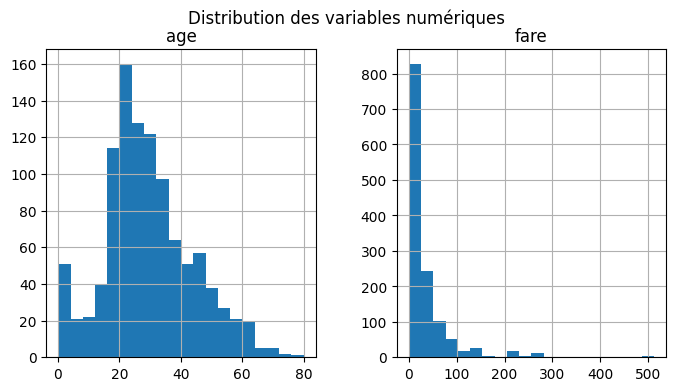

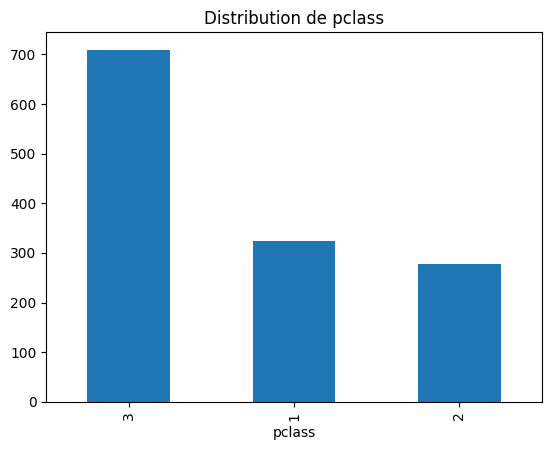

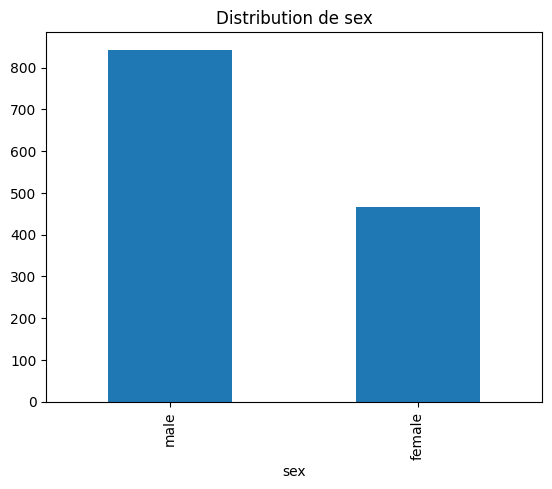

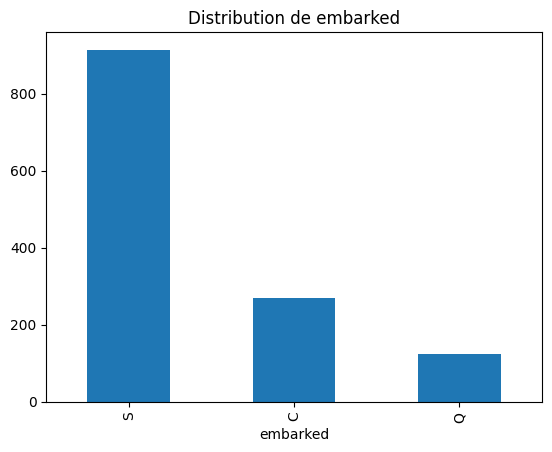

In [ ]:
df[['age', 'fare']].hist(bins=20, figsize=(8,4))
plt.suptitle("Distribution des variables numériques")
plt.show()

cat_cols = ['pclass', 'sex', 'embarked']
for col in cat_cols:
    df[col].value_counts().plot(kind='bar', title=f"Distribution de {col}")
    plt.show()


In [ ]:
num_cols = ['age', 'fare', 'sibsp', 'parch']
cat_cols = ['pclass', 'sex', 'embarked']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3081281070.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:

X = df.drop('survived', axis=1)
y = df['survived']

In [ ]:
train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

[            age  sibsp  parch     fare  pclass_2  pclass_3  sex_male  \
 999   29.881135      0      0   7.7500     False      True     False   
 392   24.000000      1      0  27.7208      True     False     False   
 628   11.000000      4      2  31.2750     False      True     False   
 1165  25.000000      0      0   7.2250     False      True      True   
 604   16.000000      0      0   7.6500     False      True     False   
 ...         ...    ...    ...      ...       ...       ...       ...   
 1290  47.000000      1      0   7.0000     False      True     False   
 1103   2.000000      4      1  39.6875     False      True      True   
 755   17.000000      2      0   8.0500     False      True      True   
 530   19.000000      0      0  10.5000      True     False      True   
 668   22.000000      0      0   8.0500     False      True      True   
 
       embarked_Q  embarked_S  
 999         True       False  
 392        False       False  
 628        False        T

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Taille du train :", X_train.shape)
print("Taille du test :", X_test.shape)

Taille du train : (1047, 9)
Taille du test : (262, 9)


In [ ]:

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

print("Standardisation et normalisation effectuées avec succès ✅")


Standardisation et normalisation effectuées avec succès ✅


Correlation Matrix

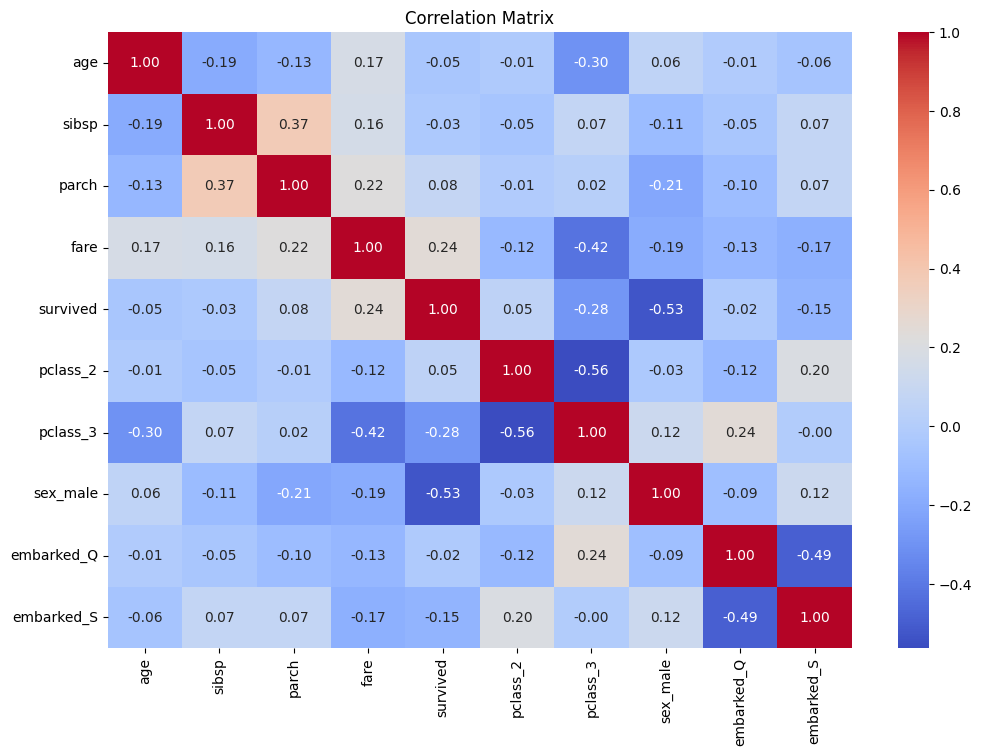

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()